In [1]:
import numpy as np

In [2]:
input_size=3
layers=[4,3]
output_size=2

In [3]:
def softmax(a):
    e_pa=np.exp(a)
    ans=e_pa/np.sum(e_pa,axis=1,keepdims=True)
    
    return ans
    

In [4]:
a=np.array([[10,10]])
print(softmax(a))

[[0.5 0.5]]


In [5]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        model={}
        
        # for first layer
        model['W1']=np.random.randn(input_size,layers[0])
        model['b1']=np.zeros((1,layers[0]))
        
        # for second layer
        model['W2']=np.random.randn(layers[0],layers[1])
        model['b2']=np.zeros((1,layers[1]))
        # for 
        model['W3']=np.random.randn(layers[1],output_size)
        model['b3']=np.zeros((1,output_size))
        
        self.model=model
        
    def forward(self,x):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        z1=np.dot(x,W1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,W2)+b2
        a2=np.tanh(z2)
        
        z3=np.dot(a2,W3)+b3
        y_=softmax(z3)
        
        self.activation_outputs=(a1,a2,y_)
        
        return y_
        
    def backward(self,X,y,learning_rate=0.001):
        
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3=self.model['b1'],self.model['b2'],self.model['b3']
        
        m=X.shape[0]
        a1,a2,y_=self.activation_outputs
        
        delta3=y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2=(1-np.square(a2))*np.dot(delta3,W3.T)
        dw2=np.dot(a1.T,delta2)
        db2=np.sum(delta2,axis=0)
        
        delta1=(1-np.square(a1))*np.dot(delta2,W2.T)
        dw1=np.dot(X.T,delta1)
        db1=np.sum(delta1,axis=0)
        
        
        self.model['W1']-=learning_rate*dw1
        self.model['b1']-=learning_rate*db1
        
        self.model['W2']-=learning_rate*dw2
        self.model['b2']-=learning_rate*db2
        
        self.model['W3']-=learning_rate*dw3
        self.model['b3']-=learning_rate*db3
        
        
    def predict(self,x):
        y_out=self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3=self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_=self.activation_outputs
        
        print("W1 : ",W1.shape)
        print("a1 : ",a1.shape)
        
        print("W2 : ",W2.shape)
        print("a2 : ",a2.shape)
        
        print("W3 : ",W3.shape)
        print("y_ : ",y_.shape)
        
        

In [6]:
def loss(y_oht,p):
    l= -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    m=y.shape[0]
    y_oht=np.zeros((m,depth))
    y_oht[np.arange(m),y]=1
    return y_oht
    

In [7]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [8]:
X,Y=make_circles(shuffle=True,n_samples=500,noise=0.2,random_state=1,factor=0.2)

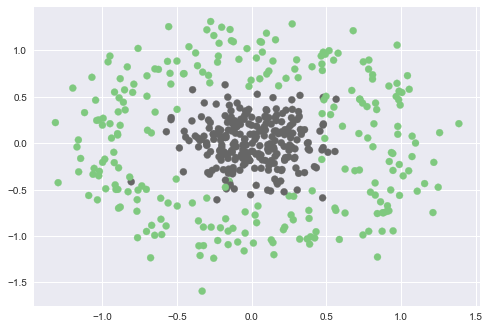

In [9]:
plt.style.use("seaborn")
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)

In [10]:
model=NeuralNetwork(input_size=2,layers=[10,4],output_size=2)

In [11]:
model.forward(X)

array([[0.29186561, 0.70813439],
       [0.77987387, 0.22012613],
       [0.21505347, 0.78494653],
       [0.02433923, 0.97566077],
       [0.9609617 , 0.0390383 ],
       [0.41346072, 0.58653928],
       [0.10473195, 0.89526805],
       [0.78946201, 0.21053799],
       [0.97022289, 0.02977711],
       [0.02251929, 0.97748071],
       [0.26027125, 0.73972875],
       [0.91932437, 0.08067563],
       [0.03005901, 0.96994099],
       [0.02543833, 0.97456167],
       [0.29735108, 0.70264892],
       [0.95448103, 0.04551897],
       [0.45458905, 0.54541095],
       [0.87578304, 0.12421696],
       [0.09401333, 0.90598667],
       [0.17126279, 0.82873721],
       [0.50396763, 0.49603237],
       [0.76300639, 0.23699361],
       [0.79203426, 0.20796574],
       [0.94608624, 0.05391376],
       [0.02910545, 0.97089455],
       [0.71094162, 0.28905838],
       [0.84033886, 0.15966114],
       [0.26520255, 0.73479745],
       [0.91327462, 0.08672538],
       [0.97062179, 0.02937821],
       [0.

In [12]:
y_oht=one_hot(Y,2)
print(y_oht)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 

# Train our Model

In [13]:
model=NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [14]:
def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss=[]
    classes=2
    
    Y_OHT=one_hot(Y,classes)
    
    for ix in range(epochs):
        Y_=model.forward(X)
        l=loss(Y_OHT,Y_)
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        
        if (logs):
            print("epochs: %d, loss: %.4f"%(ix,l))
            
    return training_loss
            
    

In [15]:
err_lst=train(X,Y,model,500,0.001)

epochs: 0, loss: 0.3571
epochs: 1, loss: 0.3554
epochs: 2, loss: 0.2593
epochs: 3, loss: 0.2407
epochs: 4, loss: 0.2258
epochs: 5, loss: 0.2132
epochs: 6, loss: 0.2020
epochs: 7, loss: 0.1919
epochs: 8, loss: 0.1827
epochs: 9, loss: 0.1742
epochs: 10, loss: 0.1664
epochs: 11, loss: 0.1593
epochs: 12, loss: 0.1527
epochs: 13, loss: 0.1467
epochs: 14, loss: 0.1411
epochs: 15, loss: 0.1360
epochs: 16, loss: 0.1313
epochs: 17, loss: 0.1270
epochs: 18, loss: 0.1230
epochs: 19, loss: 0.1193
epochs: 20, loss: 0.1159
epochs: 21, loss: 0.1127
epochs: 22, loss: 0.1098
epochs: 23, loss: 0.1070
epochs: 24, loss: 0.1045
epochs: 25, loss: 0.1021
epochs: 26, loss: 0.0999
epochs: 27, loss: 0.0978
epochs: 28, loss: 0.0958
epochs: 29, loss: 0.0940
epochs: 30, loss: 0.0922
epochs: 31, loss: 0.0906
epochs: 32, loss: 0.0891
epochs: 33, loss: 0.0876
epochs: 34, loss: 0.0862
epochs: 35, loss: 0.0849
epochs: 36, loss: 0.0837
epochs: 37, loss: 0.0825
epochs: 38, loss: 0.0814
epochs: 39, loss: 0.0803
epochs: 40

epochs: 416, loss: 0.0403
epochs: 417, loss: 0.0403
epochs: 418, loss: 0.0403
epochs: 419, loss: 0.0403
epochs: 420, loss: 0.0403
epochs: 421, loss: 0.0403
epochs: 422, loss: 0.0403
epochs: 423, loss: 0.0403
epochs: 424, loss: 0.0402
epochs: 425, loss: 0.0402
epochs: 426, loss: 0.0402
epochs: 427, loss: 0.0402
epochs: 428, loss: 0.0402
epochs: 429, loss: 0.0402
epochs: 430, loss: 0.0402
epochs: 431, loss: 0.0402
epochs: 432, loss: 0.0401
epochs: 433, loss: 0.0401
epochs: 434, loss: 0.0401
epochs: 435, loss: 0.0401
epochs: 436, loss: 0.0401
epochs: 437, loss: 0.0401
epochs: 438, loss: 0.0401
epochs: 439, loss: 0.0401
epochs: 440, loss: 0.0400
epochs: 441, loss: 0.0400
epochs: 442, loss: 0.0400
epochs: 443, loss: 0.0400
epochs: 444, loss: 0.0400
epochs: 445, loss: 0.0400
epochs: 446, loss: 0.0400
epochs: 447, loss: 0.0400
epochs: 448, loss: 0.0399
epochs: 449, loss: 0.0399
epochs: 450, loss: 0.0399
epochs: 451, loss: 0.0399
epochs: 452, loss: 0.0399
epochs: 453, loss: 0.0399
epochs: 454,

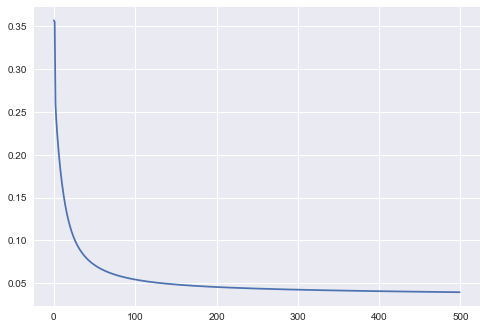

In [16]:
plt.plot(err_lst)

# visualisation

In [17]:
from visualize import plot_decision_boundary

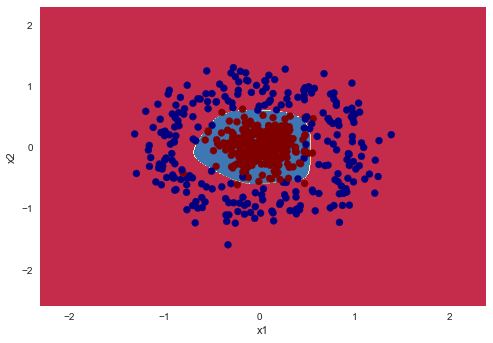

In [18]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

In [19]:
outputs=model.predict(X)

In [22]:
np.mean(outputs==Y)

0.97

# Testing on Xor 

In [35]:
X=np.array([[0,0],[0,1],[1,0],[1,1]])
Y=np.array([0,1,1,0])

In [49]:
losses=train(X,Y,model,300,0.1)

epochs: 0, loss: 0.0015
epochs: 1, loss: 0.0015
epochs: 2, loss: 0.0015
epochs: 3, loss: 0.0015
epochs: 4, loss: 0.0015
epochs: 5, loss: 0.0015
epochs: 6, loss: 0.0015
epochs: 7, loss: 0.0015
epochs: 8, loss: 0.0015
epochs: 9, loss: 0.0015
epochs: 10, loss: 0.0015
epochs: 11, loss: 0.0015
epochs: 12, loss: 0.0015
epochs: 13, loss: 0.0015
epochs: 14, loss: 0.0015
epochs: 15, loss: 0.0015
epochs: 16, loss: 0.0015
epochs: 17, loss: 0.0015
epochs: 18, loss: 0.0015
epochs: 19, loss: 0.0015
epochs: 20, loss: 0.0015
epochs: 21, loss: 0.0015
epochs: 22, loss: 0.0015
epochs: 23, loss: 0.0015
epochs: 24, loss: 0.0015
epochs: 25, loss: 0.0015
epochs: 26, loss: 0.0015
epochs: 27, loss: 0.0015
epochs: 28, loss: 0.0015
epochs: 29, loss: 0.0015
epochs: 30, loss: 0.0015
epochs: 31, loss: 0.0015
epochs: 32, loss: 0.0015
epochs: 33, loss: 0.0015
epochs: 34, loss: 0.0014
epochs: 35, loss: 0.0014
epochs: 36, loss: 0.0014
epochs: 37, loss: 0.0014
epochs: 38, loss: 0.0014
epochs: 39, loss: 0.0014
epochs: 40

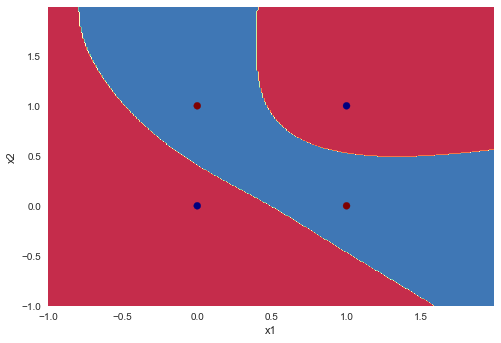

In [50]:
plot_decision_boundary(lambda x:model.predict(x),X,Y)

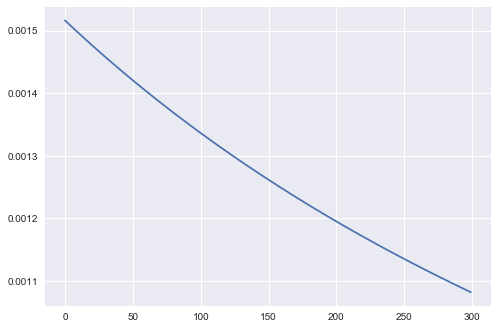

In [51]:
plt.plot(losses)

In [55]:
from sklearn.datasets import make_moons,make_circles,make_classification

In [56]:

dataset = 'xor'

def load_dataset(dataset):
    if dataset=='moons':
        X,Y = make_moons(n_samples=500,noise=0.2,random_state=1)
    elif dataset=='circles':
        X,Y = make_circles(n_samples=500, shuffle=True, noise=0.2, random_state=1, factor=0.2)
    elif dataset=='classification':
        X,Y = make_classification(n_samples=500,n_classes=2,n_features=2,n_informative=2,n_redundant=0,random_state=1)
    else:
        #Create XOR Dataset
        X = np.array([[0,0],
                    [0,1],
                    [1,0],
                    [1,1]])
        Y = np.array([0,1,1,0])
        
    return X,Y

Training Accuracy 100.0000
Training Accuracy 96.0000
Training Accuracy 97.4000
Training Accuracy 96.4000


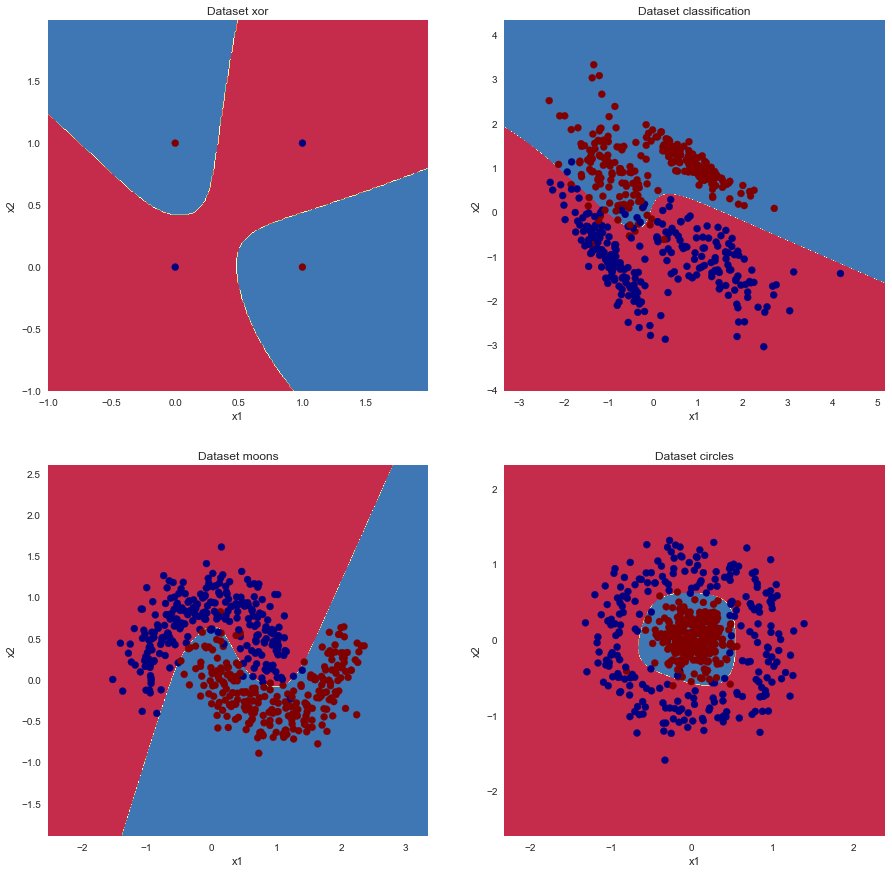

In [57]:

datasets = ["xor","classification","moons","circles"]

id = 1
plt.figure(figsize=(15,15))
for d in datasets:
    model = NeuralNetwork(input_size=2,layers=[4,3],output_size=2)
    X,Y = load_dataset(d)
    train(X,Y,model,1000,0.001,logs=False)
    
    outputs = model.predict(X)
    training_accuracy = np.sum(outputs==Y)/Y.shape[0]
    print("Training Accuracy %.4f"%(training_accuracy*100))
    
    no = 220+id
    
    plt.subplot(no)
    plt.title("Dataset "+d)
    plot_decision_boundary(lambda x:model.predict(x),X,Y)
    id +=1

plt.show()